<a href="https://colab.research.google.com/github/lukas-kh-han/Star-Wars-Character-Analysis/blob/main/Python_Project_01_Starwars_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Star Wars Character Analysis

* This is data from the Star Wars API ([SWAP](https://swapi.dev/)), which represents the characteristics of the characters in Star Wars.
*   Data from: https://dplyr.tidyverse.org/reference/starwars.html



##Questions

* What is the gender ratio of Star Wars characters?
* What is the distribution of characters' heights by gender?
* Who are the heaviest and lightest characters?
* Do characters' heights and weights correlate?

##1. Data Exploration

In [2]:
#import libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn') #default graph type
sns.set(font_scale=1)

import warnings #ignore warning message
warnings.simplefilter(action='ignore', category=FutureWarning)

<ipython-input-2-eb7129094cee>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn') #default graph type


In [3]:
#mount to Google Drive
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#import data (csv type)
sw = pd.read_csv('/content/drive/MyDrive/Python Projects/Ch 01_ Starwars/Starwars.csv')

In [5]:
#verify imported data
sw.head(5)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [6]:
#check properties of columns
sw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        87 non-null     object 
 1   height      81 non-null     float64
 2   mass        59 non-null     float64
 3   hair_color  82 non-null     object 
 4   skin_color  87 non-null     object 
 5   eye_color   87 non-null     object 
 6   birth_year  43 non-null     float64
 7   sex         83 non-null     object 
 8   gender      83 non-null     object 
 9   homeworld   77 non-null     object 
 10  species     83 non-null     object 
dtypes: float64(3), object(8)
memory usage: 7.6+ KB


In [7]:
#obtain statistical measures for numerical columns
sw.describe()

,height,mass,birth_year
count,81.000000,59.000000,43.000000
mean,174.358025,97.311864,87.565116
std,34.770429,169.457163,154.691439
min,66.000000,15.000000,8.000000
25%,167.000000,55.600000,35.000000
50%,180.000000,79.000000,52.000000
75%,191.000000,84.500000,72.000000
max,264.000000,1358.000000,896.000000


In [8]:
#obtain descriptive statistics for non-numeric columns
sw.describe(include = object)

,name,hair_color,skin_color,eye_color,sex,gender,homeworld,species
count,87,82,87,87,83,83,77,83
unique,87,12,31,15,4,2,48,37
top,Luke Skywalker,none,fair,brown,male,masculine,Naboo,Human
freq,1,37,17,21,60,66,11,35


In [9]:
#number of unique values for each non-numeric column
print('Hair color: ', sw['hair_color'].unique())
print('Skin color: ', sw['skin_color'].unique())
print('Eye color: ', sw['skin_color'].unique())
print('Sex: ', sw['sex'].unique())
print('Gender: ', sw['gender'].unique())
print('Homeworld: ', sw['homeworld'].unique())
print('Species: ', sw['species'].unique())

Hair color:  ['blond' nan 'none' 'brown' 'brown, grey' 'black' 'auburn, white'
 'auburn, grey' 'white' 'grey' 'auburn' 'blonde' 'unknown']
Skin color:  ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
Eye color:  ['fair' 'gold' 'white, blue' 'white' 'light' 'white, red' 'unknown'
 'green' 'green-tan, brown' 'pale' 'metal' 'dark' 'brown mottle' 'brown'
 'grey' 'mottled green' 'orange' 'blue, grey' 'grey, red' 'red' 'blue'
 'grey, green, yellow' 'yellow' 'tan' 'fair, green, yellow' 'grey, blue'
 'silver, red' 'green, grey' 'red, blue, white' 'brown, white' 'none']
Sex:  ['male' 'none' 'female' 'hermaphroditic' nan]
Gender:  ['masculine' 'feminine' nan]
Homeworld:  ['Tatooine' 'Naboo' 'A

In [24]:
#briefly summarize
print("Number of Data Points: ", sw.shape[0]*sw.shape[1])
print("Total Missing values: {} = {:.2f}% of the Entire Dataset".format(sw.isnull().sum().sum(), (sw.isnull().sum().sum() * 100) / (sw.shape[0] * sw.shape[1])))
print("Number of Characters: ", sw['name'].nunique())
print("Number of Species: ", sw['species'].nunique())

Number of Data Points:  957
Total Missing values: 105 = 10.97% of the Entire Dataset
Number of Characters:  87
Number of Species:  37


##2. Questions

* What is the gender ratio of Star Wars characters?
* What is the distribution of characters' heights by gender?
* Who are the heaviest and lightest characters?
* Do characters' heights and weights correlate?

##3. Data Cleaning

###3-1. Handling Missing Values

In [13]:
#identify columns where NULLs exist 
sw.isnull().any(axis = 0)

name          False
height         True
mass           True
hair_color     True
skin_color    False
eye_color     False
birth_year     True
sex            True
gender         True
homeworld      True
species        True
dtype: bool

In [15]:
#check the number of NULLs per column
sw.isnull().sum()

name           0
height         0
mass           0
hair_color     5
skin_color     0
eye_color      0
birth_year    44
sex            4
gender         4
homeworld     10
species        4
dtype: int64

In [14]:
#hair color, sex, gender, homeworld, species - since they are individual characteristics, it is meaningless to replace them with different values.
#height, mass - fill missing values with 0
sw['height'].fillna(0, inplace = True)
sw['mass'].fillna(0, inplace = True)
sw.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [19]:
#sex - distinguish 'none' and NaN 
print(sw[sw['sex'] == 'none'])
print(sw[sw['sex'].isnull()])

Empty DataFrame
Columns: [name, height, mass, hair_color, skin_color, eye_color, birth_year, sex, gender, homeworld, species]
Index: []
              name  height  mass hair_color skin_color eye_color  birth_year  \
36        Ric Oli?   183.0   0.0      brown       fair      blue         NaN   
39   Quarsh Panaka   183.0   0.0      black       dark     brown        62.0   
79       Sly Moore   178.0  48.0       none       pale     white         NaN   
85  Captain Phasma     0.0   0.0    unknown    unknown   unknown         NaN   

    sex gender homeworld species  
36  NaN    NaN     Naboo     NaN  
39  NaN    NaN     Naboo     NaN  
79  NaN    NaN    Umbara     NaN  
85  NaN    NaN       NaN     NaN  


In [17]:
#the data values that are 'none' in the 'sex' column are all of the species 'Droid'
#so change their content from 'none' to 'robot' in the column 'sex'
sw['sex'][(sw['sex'] == 'none')] = 'robot'
print('Sex: ', sw['sex'].unique())

Sex:  ['male' 'robot' 'female' 'hermaphroditic' nan]


<ipython-input-17-aedb8c37b719>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sw['sex'][(sw['sex'] == 'none')] = 'robot'


##4. EDA & Visualization

###4-1. What is the gender ratio of Star Wars characters?

In [22]:
#count the occurrences of each unique value; 'sex', 'gender'
sw['gender'].value_counts()
sw['sex'].value_counts()

male              60
female            16
robot              6
hermaphroditic     1
Name: sex, dtype: int64

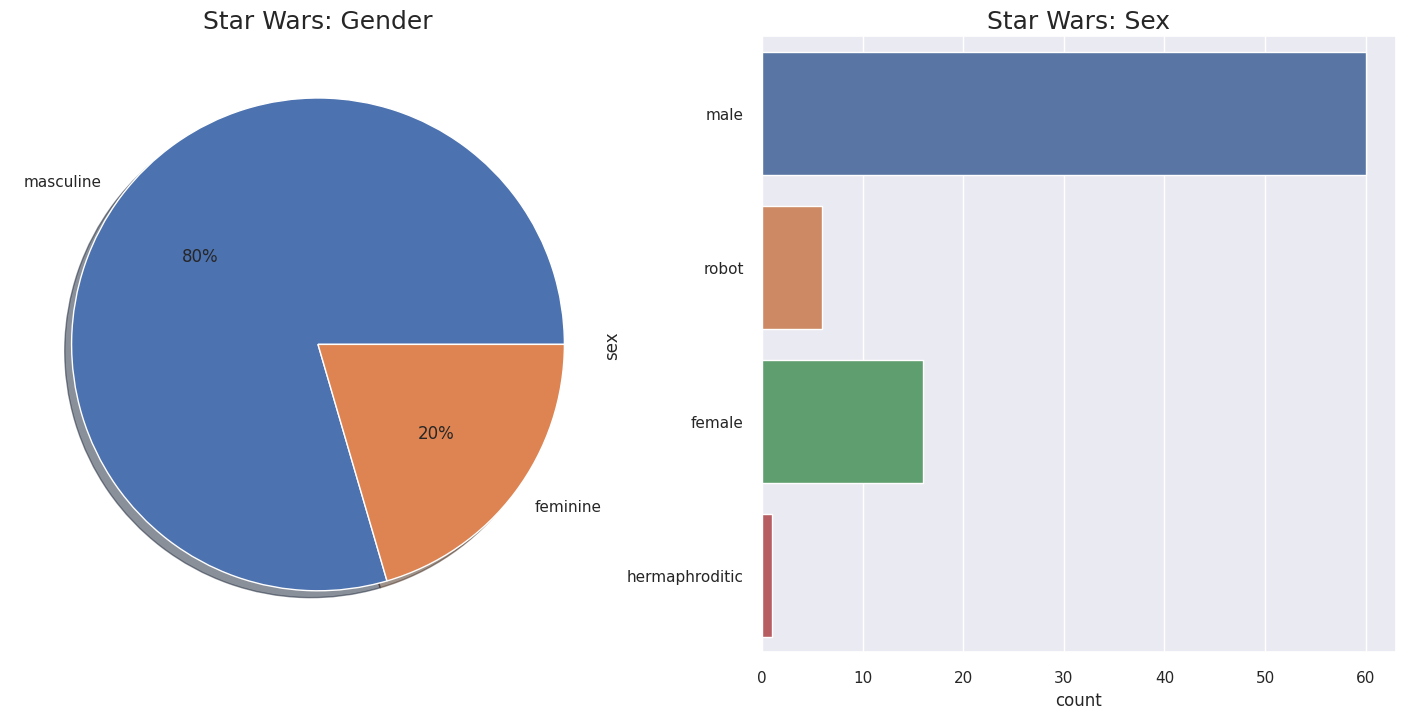

In [26]:
#data visualization; the gender ratio of Star Wars characters
f, ax = plt.subplots(1, 2, figsize = (18, 8)) 

#sns.countplot
sw['gender'].value_counts().plot.pie(ax = ax[0], autopct = '%1.0f%%', shadow = True) 
ax[0].set_title('Star Wars: Gender', size=18) 
ax[0].set_ylabel('') 

#sns.countplot
sns.countplot(y = 'sex', data = sw, ax = ax[1])
ax[1].set_title('Star Wars: Sex', size = 18) 

plt.show()

###4-2. What is the distribution of characters' heights by gender?

In [27]:
#obtain descriptive statistics for the 'height' column
#check min and max values
sw['height'].describe()

count     87.000000
mean     162.333333
std       55.671726
min        0.000000
25%      164.000000
50%      178.000000
75%      190.500000
max      264.000000
Name: height, dtype: float64

In [29]:
#print skewness and kurtosis 
print("Skewness: %f" % sw['height'].skew())
print("Kurtosis: %f" % sw['height'].kurt())

Skewness: -1.760878
Kurtosis: 2.927697


In [30]:
#only one piece of data for'hermaphroditic'; can not get a probability distribution
sw[sw['sex'] == 'hermaphroditic'].head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,sex,gender,homeworld,species
15,Jabba Desilijic Tiure,175.0,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphroditic,masculine,Nal Hutta,Hutt


<ipython-input-34-a0f130598398>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sw[sw['sex'] == 'male']['height'], ax = ax[0])
<ipython-input-34-a0f130598398>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sw[sw['sex'] == 'female']['height'], ax = ax[0])
<ipython-input-34-a0f130598398>:9: Use

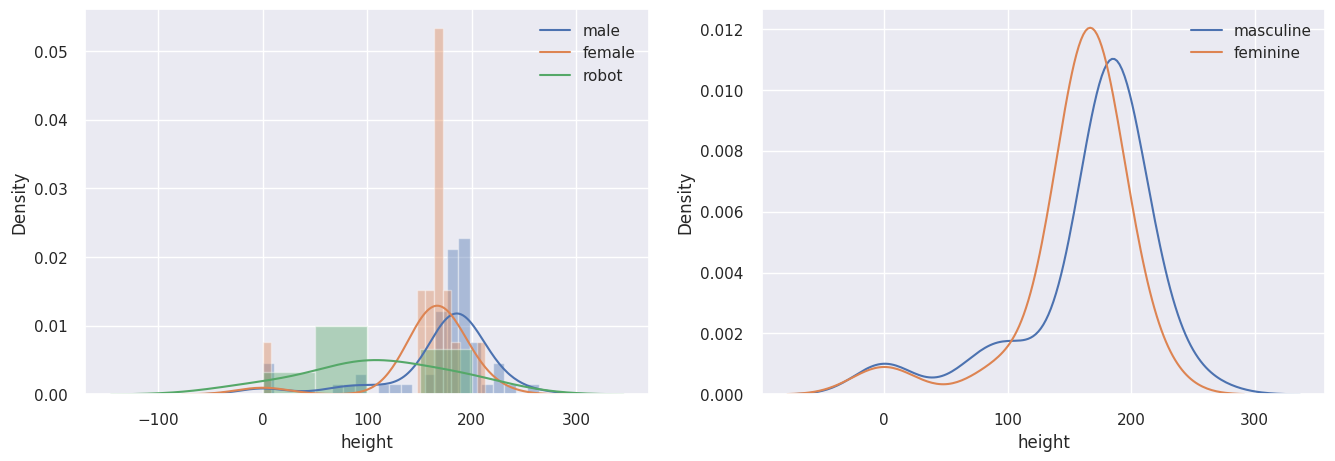

In [34]:
#data visualization; distribution of height data for Star Wars characters by gender
#excluded 'hermaphroditic' 

fig, ax = plt.subplots(1, 2, figsize = (16, 5))

#sns.distplot
sns.distplot(sw[sw['sex'] == 'male']['height'], ax = ax[0])
sns.distplot(sw[sw['sex'] == 'female']['height'], ax = ax[0])
sns.distplot(sw[sw['sex'] == 'robot']['height'], ax = ax[0])
ax[0].legend(['male','female','robot'])

#sns.kdeplot
sns.kdeplot(sw[sw['gender'] == 'masculine']['height'], ax = ax[1])
sns.kdeplot(sw[sw['gender'] == 'feminine']['height'], ax = ax[1])
ax[1].legend(['masculine','feminine'])

plt.show()


###4-3. Who are the heaviest and lightest characters?

In [35]:
#find the lightest character
notz = sw[sw['mass'] != 0]  #exclude data with a weight of 0
min(notz['mass'])

15.0

In [37]:
#print heaviest and lightest characters
print("{}의 몸무게가 {} (으)로 가장 가볍다 ".format(notz[notz['mass'] == min(notz['mass'])]['name'].values, min(notz['mass'])))
print("{}의 몸무게가 {} (으)로 가장 무겁다 ".format(notz[notz['mass'] == max(notz['mass'])]['name'].values, max(notz['mass'])))

['Ratts Tyerell']의 몸무게가 15.0 (으)로 가장 가볍다 
['Jabba Desilijic Tiure']의 몸무게가 1358.0 (으)로 가장 무겁다 


###4-4. Do Star Wars characters' heights and weights correlate?

In [38]:
#calculate the average weight of each Star Wars per species with Groupby function
weight = sw[['species', 'mass']].groupby(['species'], as_index = True).mean()
weight

,mass
species,
Aleena,15.000000
Besalisk,102.000000
Cerean,82.000000
Chagrian,0.000000
Clawdite,55.000000
Droid,46.500000
Dug,40.000000
Ewok,20.000000
Geonosian,80.000000


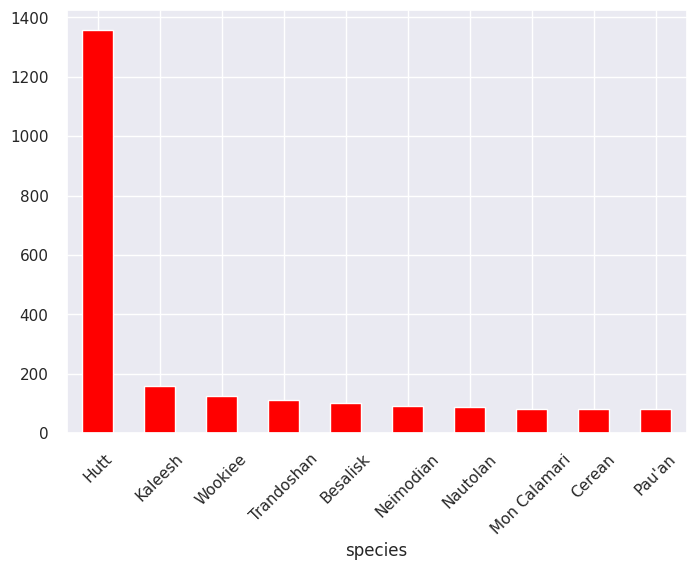

In [44]:
#graph the top 10 species by weight
weight['mass'].sort_values(ascending = False).head(10).plot.bar(color = 'red')

plt.xticks(rotation = 45)
plt.show()

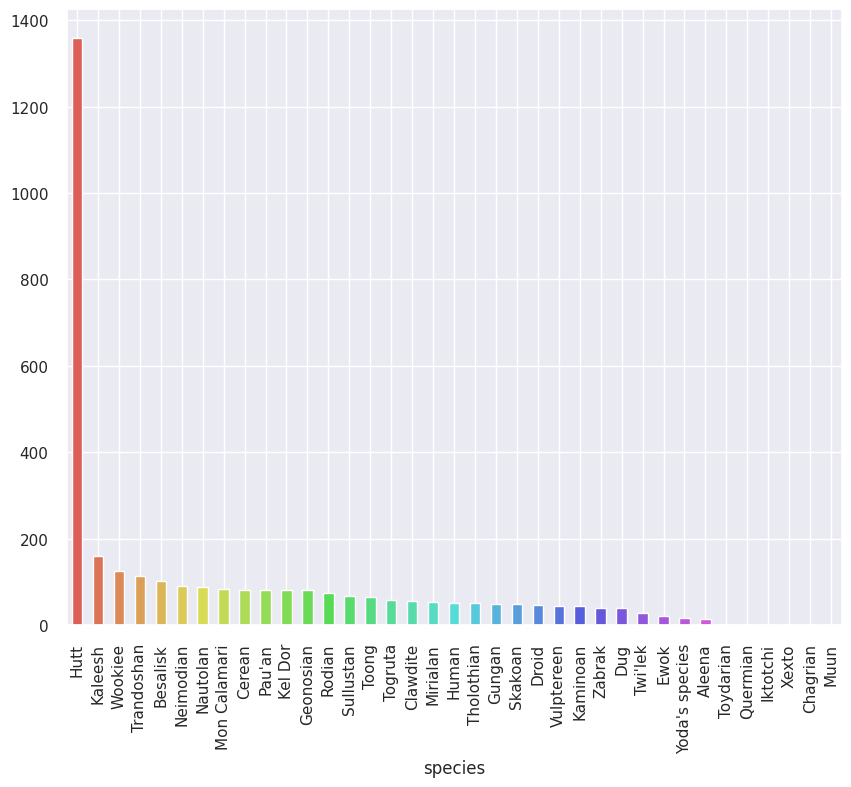

In [48]:
#graph species in Star Wars by weight
f, ax = plt.subplots(1, 1, figsize=(10, 8))

colors = sns.color_palette('hls',len(weight['mass'])) #color palette: hls

g = weight['mass'].sort_values(ascending=False).plot.bar(color = colors)
g.set_xticklabels(g.get_xticklabels(),rotation = 90) 
plt.show()

In [53]:
#exclude outlier: Hutt (too big)
#exclude data with a weight of 0
out1 = sw['species'].isin(['Hutt'])
out2 = sw['mass'].isin([0])
sw[~out1][~out2].shape

<ipython-input-53-4e3d60c6794b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sw[~out1][~out2].shape


(58, 11)

<ipython-input-55-7552dc6c628a>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lmplot(data = sw[~out1][~out2], x = 'height', y = 'mass', hue = 'gender') #hue=gender로 나타내서도 살펴보기


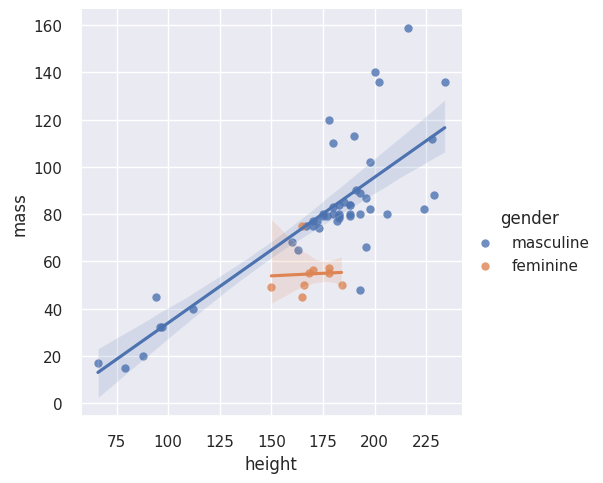

In [55]:
#create a scatter plot with a linear regression line fit to visualize the correaltion between height and weight

sns.lmplot(data = sw[~out1][~out2], x = 'height', y = 'mass', hue = 'gender') #hue=gender
sns.set_style(style='darkgrid') 

plt.show()

##5. Review

* Summary of dataset:  
  - The available Star Wars dataset contains a total of 957 data points. 
  - Out of the total data points, there are 105 missing values, which accounts for approximately 10.97% of the dataset.  
  - There are 87 distinct characters in the Star Wars universe. 
  - The Star Wars universe features a diverse range of 37 different races or species.  

* What is the gender ratio of Star Wars characters?  
  - Male characters account for 80% of the total population in the Star Wars dataset.

* What is the distribution of characters' heights by gender?  
  - Male characters tend to have a greater average height compared to female characters in the Star Wars dataset, while robots typically have a shorter stature.

* Who are the heaviest and lightest characters?  
  - Among the characters in the Star Wars dataset, 'Ratts Tyerell' holds the record for being the lightest, weighing in at 15.0. 
  - On the other hand, 'Jabba Desilijic Tiure' is the heaviest character, weighing 1358.0.

* Do Star Wars characters' heights and weights correlate?  
  - Yes. Despite living on a different planet than humans, the height and weight of characters in the Star Wars dataset exhibit a proportional relationship.
